# PC assemble production line simulation (human edition)

## Initialization

Import the required libraries.

In [28]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(7)

Initialize the state object

In [44]:
pcs = State(left = 0)
time = State(elapsed = 0)

,values
elapsed,0


Initialize the TimeSeries objects

In [45]:
assembled_pcs = TimeSeries()

,values


## Declaration

Declare the `assemble_pcs` function.

In [46]:
def assemble_pcs(employees):
    total_time = 0
    for i in range(employees):
        total_time += random.randint(1800, 2900)
    average_time = total_time / employees
    return average_time

Declare the `draw` function.

In [14]:
def draw():
    plot(assembled_pcs, color='blue', label='Assembled pcs')

    decorate(title='Assembled pcs by persons per day',
            xlabel='Time step (work days)', 
            ylabel='Number of pcs')

    savefig('figs/chap02-fig01.pdf')

Declare the `run_simulation` function.

In [15]:
def run_simulation(employees, pc_quantity):
    pcs.left = pc_quantity
    
    time_limit = 8 * 60 * 60 # work day time in seconds

    day = 1
    while (pcs.left > 0):
        assemble_time = assemble_pcs(employees)
        time.elapsed += assemble_time
        pcs.left -= employees

        if (time.elapsed >= time_limit):
            assembled_pcs[day] = pc_quantity - pcs.left
            time.elapsed = 0
            print(pc_quantity - pcs.left)
            day += 1  
    draw()

# Run simulation

- Employees: 
- Pc_quantity:

### No quarantine

650
1300
1950
2600
3250
3900
4550
Saving figure to file figs/chap02-fig01.pdf


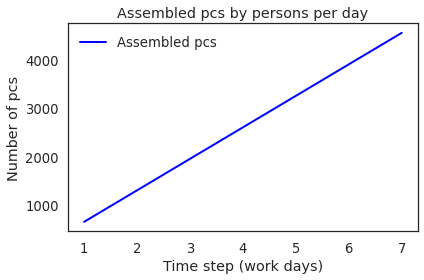

In [47]:
run_simulation(50, 5000)